# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as metrics
import os

%matplotlib inline

### Amino acid propensities are usually calculated regarding the secondary structure.

A propensity between zero and one indicates that an amino acid avoids that type of secondary structure, a propensity of one indicates no preference and a propensity larger than one indicates a strong preference for that secondary structure type.

Here we calculate the propensity of an amino acid (1.any and 2.exposed) to be associated with the EVs

# Define paths

In [2]:
Data_path = os.path.dirname(os.path.dirname(os.getcwd())) + '/Data'

# Import data sets

I need the curated datasets but there we already calculated fractions. I need actualy numbers of aa residues, therefore I need to fetch those numbers from the unfiltered datasets.

In [3]:
df_all = Data_path + '/MachineLearning/training_data.csv' 
df_all = pd.read_csv(df_all, sep=',', engine='python')
df_all = df_all[['id','EV']]

In [5]:
# import NSP2 predictions for human genome
nsp = Data_path + '/Raw/NSP2_complete.tab'
df_features = pd.read_csv(nsp, sep='\t', engine='python') # 20384 proteins, does not include TITIN (NSP2 cannot run such a big protein)
df_features = df_features.drop(columns=['PDB', 'q3_H', 'q3_E', 'q3_C', 'on_surface']) # drop ununsed columns

In [6]:
# if RSA > 0.4 AA residue is exposed
nsp_aa_exposed = Data_path + '/Raw/NSP_exposed_aa.csv'
nsp_aa_exposed = pd.read_csv(nsp_aa_exposed, sep=',', engine='python') 
df_features = pd.merge(df_features, nsp_aa_exposed, on=['id'], how="left") 

# prop = propensity
prop = pd.merge(df_all, df_features, on=['id'], how="left") 

In [8]:
prop.columns

Index(['id', 'EV', 'length', 'hydr_count', 'polar_count', 'molecular_weight',
       'helix', 'turn', 'sheet', 'A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K',
       'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', 'fasta_sequence',
       'thsa_netsurfp2', 'tasa_netsurfp2', 'rhsa_netsurfp2', 'disorder',
       'A_exposed', 'C_exposed', 'D_exposed', 'E_exposed', 'F_exposed',
       'G_exposed', 'H_exposed', 'I_exposed', 'K_exposed', 'L_exposed',
       'M_exposed', 'N_exposed', 'P_exposed', 'Q_exposed', 'R_exposed',
       'S_exposed', 'T_exposed', 'V_exposed', 'W_exposed', 'Y_exposed'],
      dtype='object')

# amino acid count

In [9]:
prop_df = prop[['id', 'EV', 'A', 'C', 'D','E','F','G','H','I','K',
                'L','M','N', 'P','Q','R', 'S','T','V','W','Y']]
aa_columns = ['A', 'C', 'D','E','F','G','H','I','K',
                'L','M','N', 'P','Q','R', 'S','T','V','W','Y']

prop_df['Total'] = prop_df[aa_columns].sum(axis=1)
#list(prop.columns)
EV = prop_df[prop_df['EV']==1]

# Fraction of total number of amino acids to be in EVs

In [13]:
n_of_aa_in_EV = sum(EV['Total'])
total_aa = sum(prop_df['Total'])# Fraction of amino acids in EVs

p_total_EV = n_of_aa_in_EV/total_aa
print(p_total_EV)

# Fraction of a certain amino acid in EVs

In [15]:
propensity_dict = {'AA':[],'Propensity':[]}

for aa in aa_columns:
    n_of_aa_in_EV = sum(EV[aa])
    total_n = sum(prop_df[aa])
    p_aa_EV = n_of_aa_in_EV/total_n
    propensity = p_aa_EV/p_total_EV
    propensity_dict['AA'].append(aa)
    propensity_dict['Propensity'].append(propensity)

In [16]:
propensities = pd.DataFrame.from_dict(propensity_dict)

# Exposed AA propensities

In [18]:
prop_exp_df = prop[['id','EV','A_exposed', 'C_exposed', 'D_exposed','E_exposed','F_exposed','G_exposed','H_exposed', 'I_exposed', 'K_exposed', 'L_exposed', 'M_exposed', 'N_exposed', 'P_exposed', 'Q_exposed', 'R_exposed', 
                    'S_exposed', 'T_exposed', 'V_exposed', 'W_exposed', 'Y_exposed']]

exp_aa_columns = ['A_exposed', 'C_exposed', 'D_exposed','E_exposed','F_exposed','G_exposed','H_exposed', 'I_exposed', 'K_exposed', 'L_exposed', 'M_exposed', 'N_exposed', 'P_exposed', 'Q_exposed', 'R_exposed', 
                    'S_exposed', 'T_exposed', 'V_exposed', 'W_exposed', 'Y_exposed']

prop_exp_df['Total'] = prop_exp_df[exp_aa_columns].sum(axis=1)

In [21]:
EV = prop_exp_df[prop_exp_df['EV']==1]

n_of_aa_in_EV = sum(EV['Total'])
total_aa = sum(prop_exp_df['Total'])# Fraction of amino acids in EVs
p_total_EV = n_of_aa_in_EV/total_aa
print(p_total_EV)

In [23]:
exp_propensity_dict = {'AA':[],'Propensity':[]}

for aa in exp_aa_columns:
    n_of_aa_in_EV = sum(EV[aa])
    total_n = sum(prop_exp_df[aa])
    p_aa_EV = n_of_aa_in_EV/total_n
    propensity = p_aa_EV/p_total_EV
    exp_propensity_dict['AA'].append(aa)
    exp_propensity_dict['Propensity'].append(propensity)

In [24]:
exp_propensities = pd.DataFrame.from_dict(exp_propensity_dict)

In [25]:
prop_exp_aa = list(exp_propensities['Propensity'])
exp_aa = list(exp_propensities['AA'])
propensities['Propensity_exp'] = prop_exp_aa
propensities['AA_exp'] = exp_aa

In [26]:
propensities['AA propensity'] = propensities['Propensity'] - 1
propensities['Exposed AA propensity'] = propensities['Propensity_exp'] - 1

In [27]:
propensities

,AA,Propensity,Propensity_exp,AA_exp,AA propensity,Exposed AA propensity
0,A,1.002030,0.987104,A_exposed,0.002030,-0.012896
1,C,0.944495,0.882839,C_exposed,-0.055505,-0.117161
2,D,1.032533,1.049858,D_exposed,0.032533,0.049858
3,E,1.015695,1.031736,E_exposed,0.015695,0.031736
4,F,0.984267,0.929248,F_exposed,-0.015733,-0.070752
5,G,1.011632,1.008694,G_exposed,0.011632,0.008694
6,H,0.945742,0.965272,H_exposed,-0.054258,-0.034728
7,I,1.025248,0.960922,I_exposed,0.025248,-0.039078
8,K,1.015322,1.027081,K_exposed,0.015322,0.027081
9,L,0.995168,0.938429,L_exposed,-0.004832,-0.061571


In [28]:
my_pal = {"moccasin","peru"}

ax = sns.barplot(x="AA", y="Exposed AA propensity", data=propensities,
                 palette="rocket")

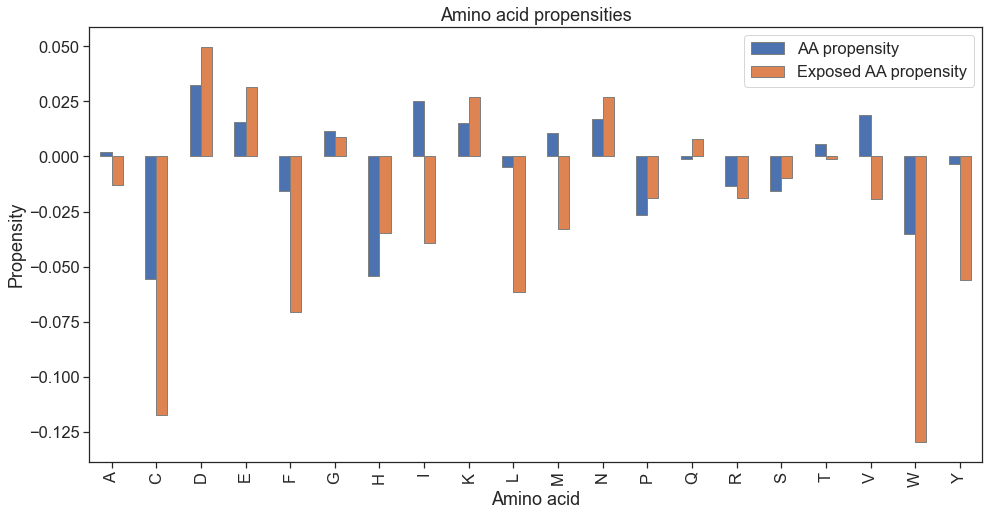

In [32]:
bar = propensities.plot(x="AA", y=["AA propensity", "Exposed AA propensity"], kind="bar",figsize=(16,8), edgecolor = 'grey')
sns.set(style=("ticks"), font_scale=1.5,palette=my_pal)
bar.set(xlabel='Amino acid', ylabel="Propensity", title="Amino acid propensities")
plt.show()

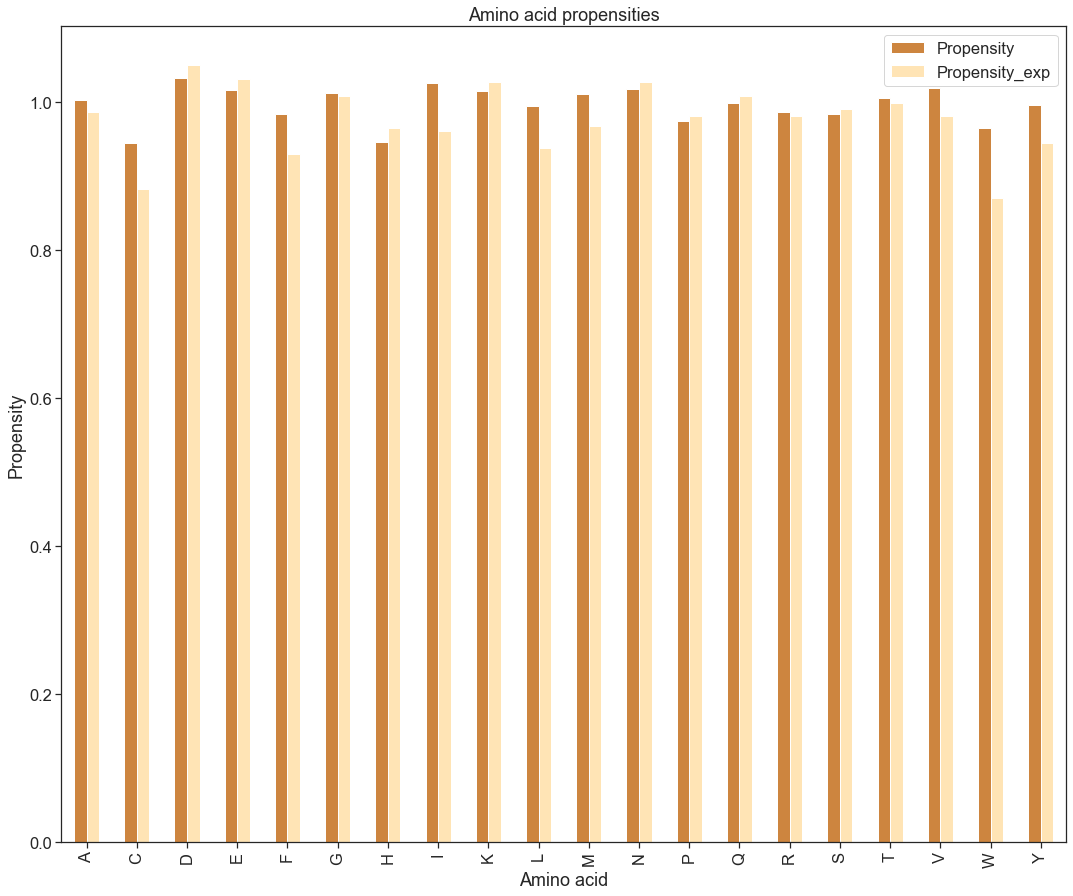

In [31]:
bar = propensities.plot(x="AA", y=["Propensity", "Propensity_exp"], kind="bar",figsize=(18,15))
sns.set(style=("ticks"), font_scale=1.5)
bar.set(xlabel='Amino acid', ylabel="Propensity", title="Amino acid propensities")
plt.show()